In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. About Python

## 2. Getting Started

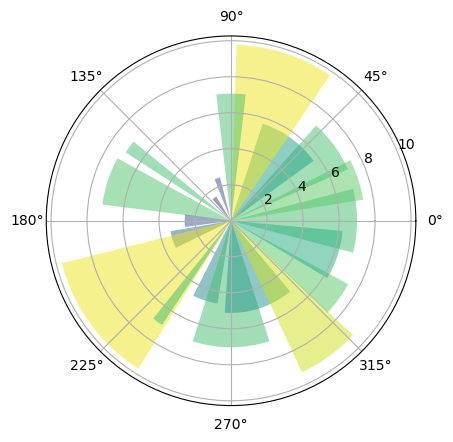

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [3]:
np.random.randn(3)

array([-0.12758733, -0.51931744,  0.73514322])

In [4]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    I

## 3. An Introductory Example

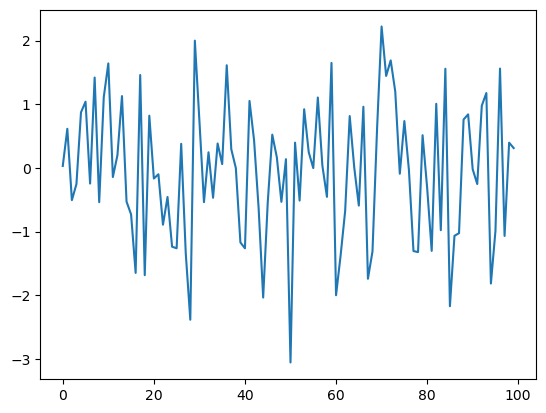

In [6]:
e_values = np.random.randn(100)
plt.plot(e_values)
plt.show()

In [7]:
np.sqrt(4)

2.0

In [8]:
np.log(4)

1.3862943611198906

In [12]:
x = []
x.pop?

Signature: x.pop(index=-1, /)
Docstring:
Remove and return item at index (default last).

Raises IndexError if list is empty or index is out of range.
Type:      builtin_function_or_method

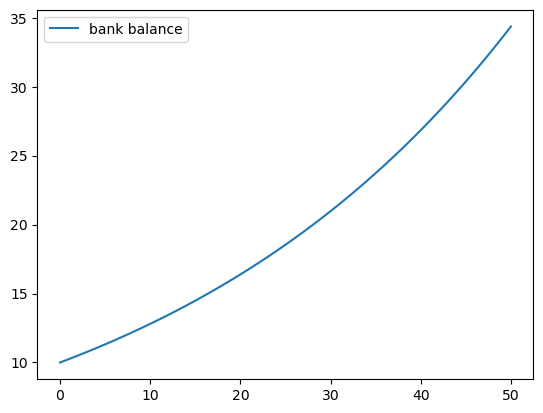

In [24]:
r = 0.025 # interest rate
T = 50 # end date
b = np.empty(T+1) # empty np array to store all of b_t
b[0] = 10

for t in range(T):
    b[t+1] = b[t]*(1 + r) 

plt.plot(b, label="bank balance")
plt.legend()
plt.show()


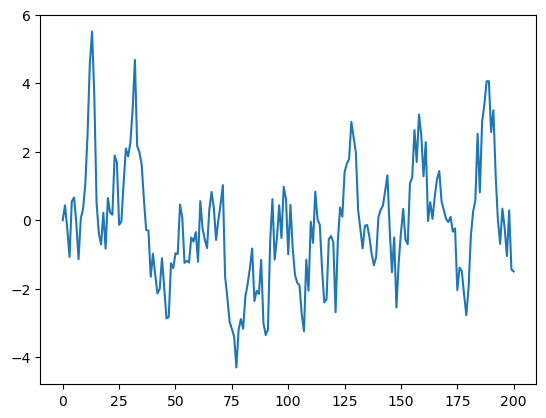

In [46]:
# Exercise 3.1

T = 200
alpha = 0.8

x = np.empty(T+1)
x[0] = 0


for t in range(T):
    x[t+1] = alpha * x[t] + np.random.randn()

plt.plot(x)
plt.show()

0.0
0.0
0.0


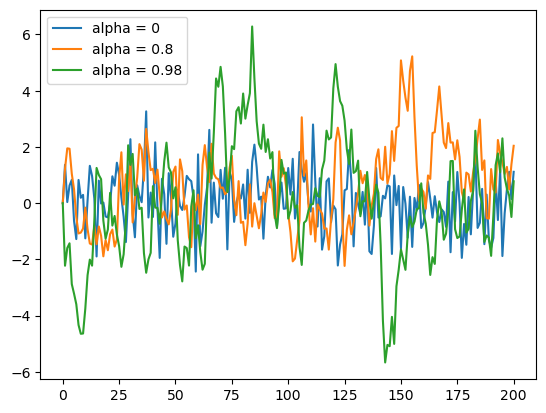

In [59]:
# Exercise 3.2

T = 200
alphas = [0, 0.8, 0.98]
x = np.empty(T+1)
x[0] = 0

for alpha in alphas:
    for t in range(T):
        x[t+1] = alpha * x[t] + np.random.randn()
    plt.plot(x, label=f"alpha = {alpha}")

plt.legend()
plt.show()

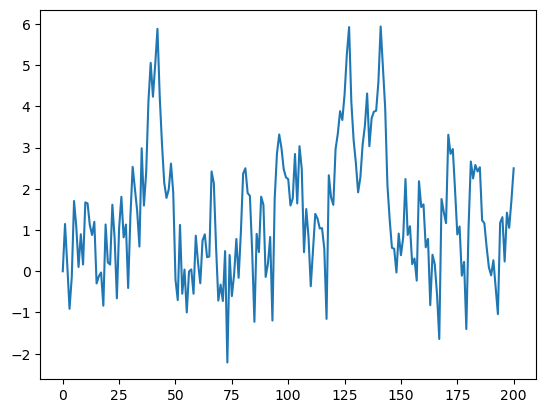

In [62]:
# Exercise 3.3

T = 200
alpha = 0.9
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = alpha * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()

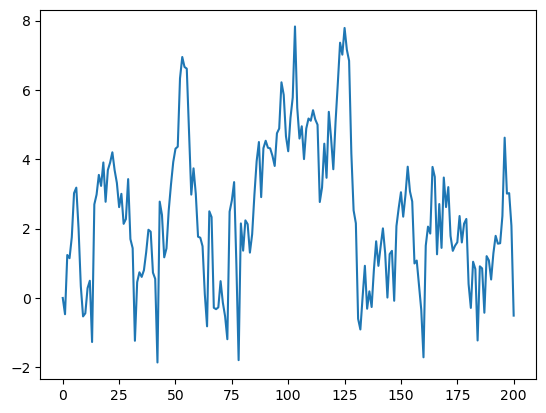

In [68]:
# Exercise 3.4


T = 200
alpha = 0.9
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = x[t] if x[t] > 0 else -x[t]
    # if x[t] < 0:
    #     abs_x = -x[t]
    # else:
    #     abs_x = x[t]
    x[t+1] = alpha * abs_x + np.random.randn()

plt.plot(x)
plt.show()

In [69]:
# Exercise 3.5
n = 1000000 # sample size for Monte Carlo simulation

count = 0
for i in range(n):

    # drawing random positions on the square
    u, v = np.random.uniform(), np.random.uniform()

    # check whether the point falls within the boundary
    # of the unit circle centred at (0.5,0.5)
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

    # if it falls within the inscribed circle, 
    # add it to the count
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.14106


## 4. Functions

In [70]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [71]:
max(19,20)

20

In [73]:
print('foobar')

foobar


In [74]:
str(22)

'22'

In [75]:
type(22)

int

In [76]:
bools = False, True, True 
all(bools) # True if all are True, false otherwise

False

In [77]:
any(bools) # False if all are False, true otherwise

True

In [78]:
import calendar

In [81]:
calendar.isleap(2020)

True

In [82]:
def f(x):
    return 2 * x + 1

In [83]:
f(1)

3

In [84]:
f(10)

21

In [86]:
# These are equivalent.
def f(x):
    return x**3 

f2 = lambda x: x**3


In [107]:
# Exercise 4.1
def factorial(n, f):
    n = f(n)
    fact = 1
    for t in range(n):
        fact *= n-t
    return fact

even_odd = lambda n: n**2+1 if n%2 ==0 else n**2

# def even_odd(n):
#     if n % 2 == 0:
#         return n**2 + 1
#     else:
#         return n**2

In [109]:
print(factorial(2, even_odd))

120


In [119]:
# Exercise 4.2
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        count +=  0 if U > p else 1
    return count

print(binomial_rv(10, .50))

3


In [120]:
# Exercise 4.3
def coin_flips1(k):
    consec_heads = 0
    for i in range(10):
        heads = binomial_rv(1, .5)
        if heads:
            consec_heads += 1
        else:
            consec_heads = 0
        if consec_heads >= k:
            return 'pay a dollar'
    return 'pay nothing'

def coin_flips2(k):
    heads = 0
    for i in range(10):
        heads = binomial_rv(1, .5)
        if heads:
            heads += 1
    if heads >= k:
        return 'pay a dollar'
    return 'pay nothing'


In [124]:
print(coin_flips1(3))
print(coin_flips2(3))

pay a dollar
pay nothing


In [127]:
# Exercise 4.4
def fib(t):
    if t == 0: return 0 
    if t == 1: return 1
    else: return fib(t-1) + fib(t-2)

print([fib(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [130]:
def recursive_fact(n):
    if n == 0:
        return 1
    if n == 1:
        return n
    else: return n * recursive_fact(n-1)

In [131]:
print([recursive_fact(i) for i in range(10)])

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]
